In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set global configurations
RANDOM_STATE = 55
sns.set(style="whitegrid")


In [78]:
# Load datasets
train_df = pd.read_csv('dataGaia_AB_train.csv')
unknown_df = pd.read_csv('dataGaia_AB_unknown.csv')
head_desc = pd.read_csv('head_description.csv')

# Display the first few rows of each dataset
display(train_df.head(), unknown_df.head(), head_desc.head())


,ID,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
0,1,1,44.375187,2.895901,1.400000e+15,1.8937,16.954,7.031,-15.427,10.369156,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
1,2,2,42.959304,2.920459,1.550000e+15,2.9732,2.528,1.795,1.780,10.038978,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
2,3,3,44.031079,3.203683,1.610000e+15,2.2337,10.776,-3.151,-10.305,9.810181,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
3,4,4,45.463599,3.138095,1.750000e+15,4.0179,10.053,1.828,9.885,8.163041,...,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A
4,5,5,43.784164,3.486814,2.060000e+15,11.6458,32.355,29.688,-12.863,6.855547,...,0.257051,NaN,7192.3,85.7073,2.0194,9.909233,1.647,1.288,0.459583,A


,ID,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
0,119089,19089,64.085883,46.209497,2.340000e+17,0.3386,1.067,-0.841,-0.656,13.132349,...,0.272599,0.444520,NaN,11663.4,2031.7985,2.8537,239.107820,3.514,NaN,0.515510
1,24912,24912,14.701590,67.754101,5.270000e+17,1.6877,3.527,-1.976,-2.921,12.781258,...,0.504253,0.678857,NaN,7661.9,615.7902,1.7595,9.183199,1.665,0.749,0.661103
2,6264,6264,55.953330,38.656112,2.240000e+17,0.8378,8.216,6.574,-4.927,12.053966,...,0.196862,0.331098,NaN,7820.4,1254.6984,2.9247,23.100883,1.986,0.920,0.322678
3,81903,81903,91.211868,-14.372262,2.990000e+18,1.1175,12.945,7.306,10.687,11.559693,...,0.126262,0.251504,NaN,8984.8,890.9888,2.2170,26.935236,2.133,0.499,0.516520
4,110917,10917,75.949263,40.560254,2.010000e+17,0.9456,5.200,3.248,-4.061,15.013525,...,0.252923,0.483553,NaN,10195.4,5160.0750,3.3666,111.986990,2.916,0.319,0.441721


,RA_ICRS,Right ascension in the ICRS (International Celestial Reference System) coordinate system.
0,DE_ICRS,Declination in the ICRS coordinate system.
1,Source,Unique identifier for an object in the Gaia c...
2,Plx,Trigonometric parallax of the celestial body ...
3,PM,Total proper motion of the celestial body in ...
4,pmRA,Proper motion component in the right ascensio...


In [79]:
selected_columns = ['RA_ICRS', 'DE_ICRS', 'Source', 'Plx', 'PM', 'pmRA',
       'pmDE', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag',
       'GRVSmag', 'e_GRVSmag', 'BP-RP', 'BP-G', 'G-RP', 'pscol', 'Teff',
       'Dist', 'Rad', 'Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame']
response_column = 'SpType-ELS'

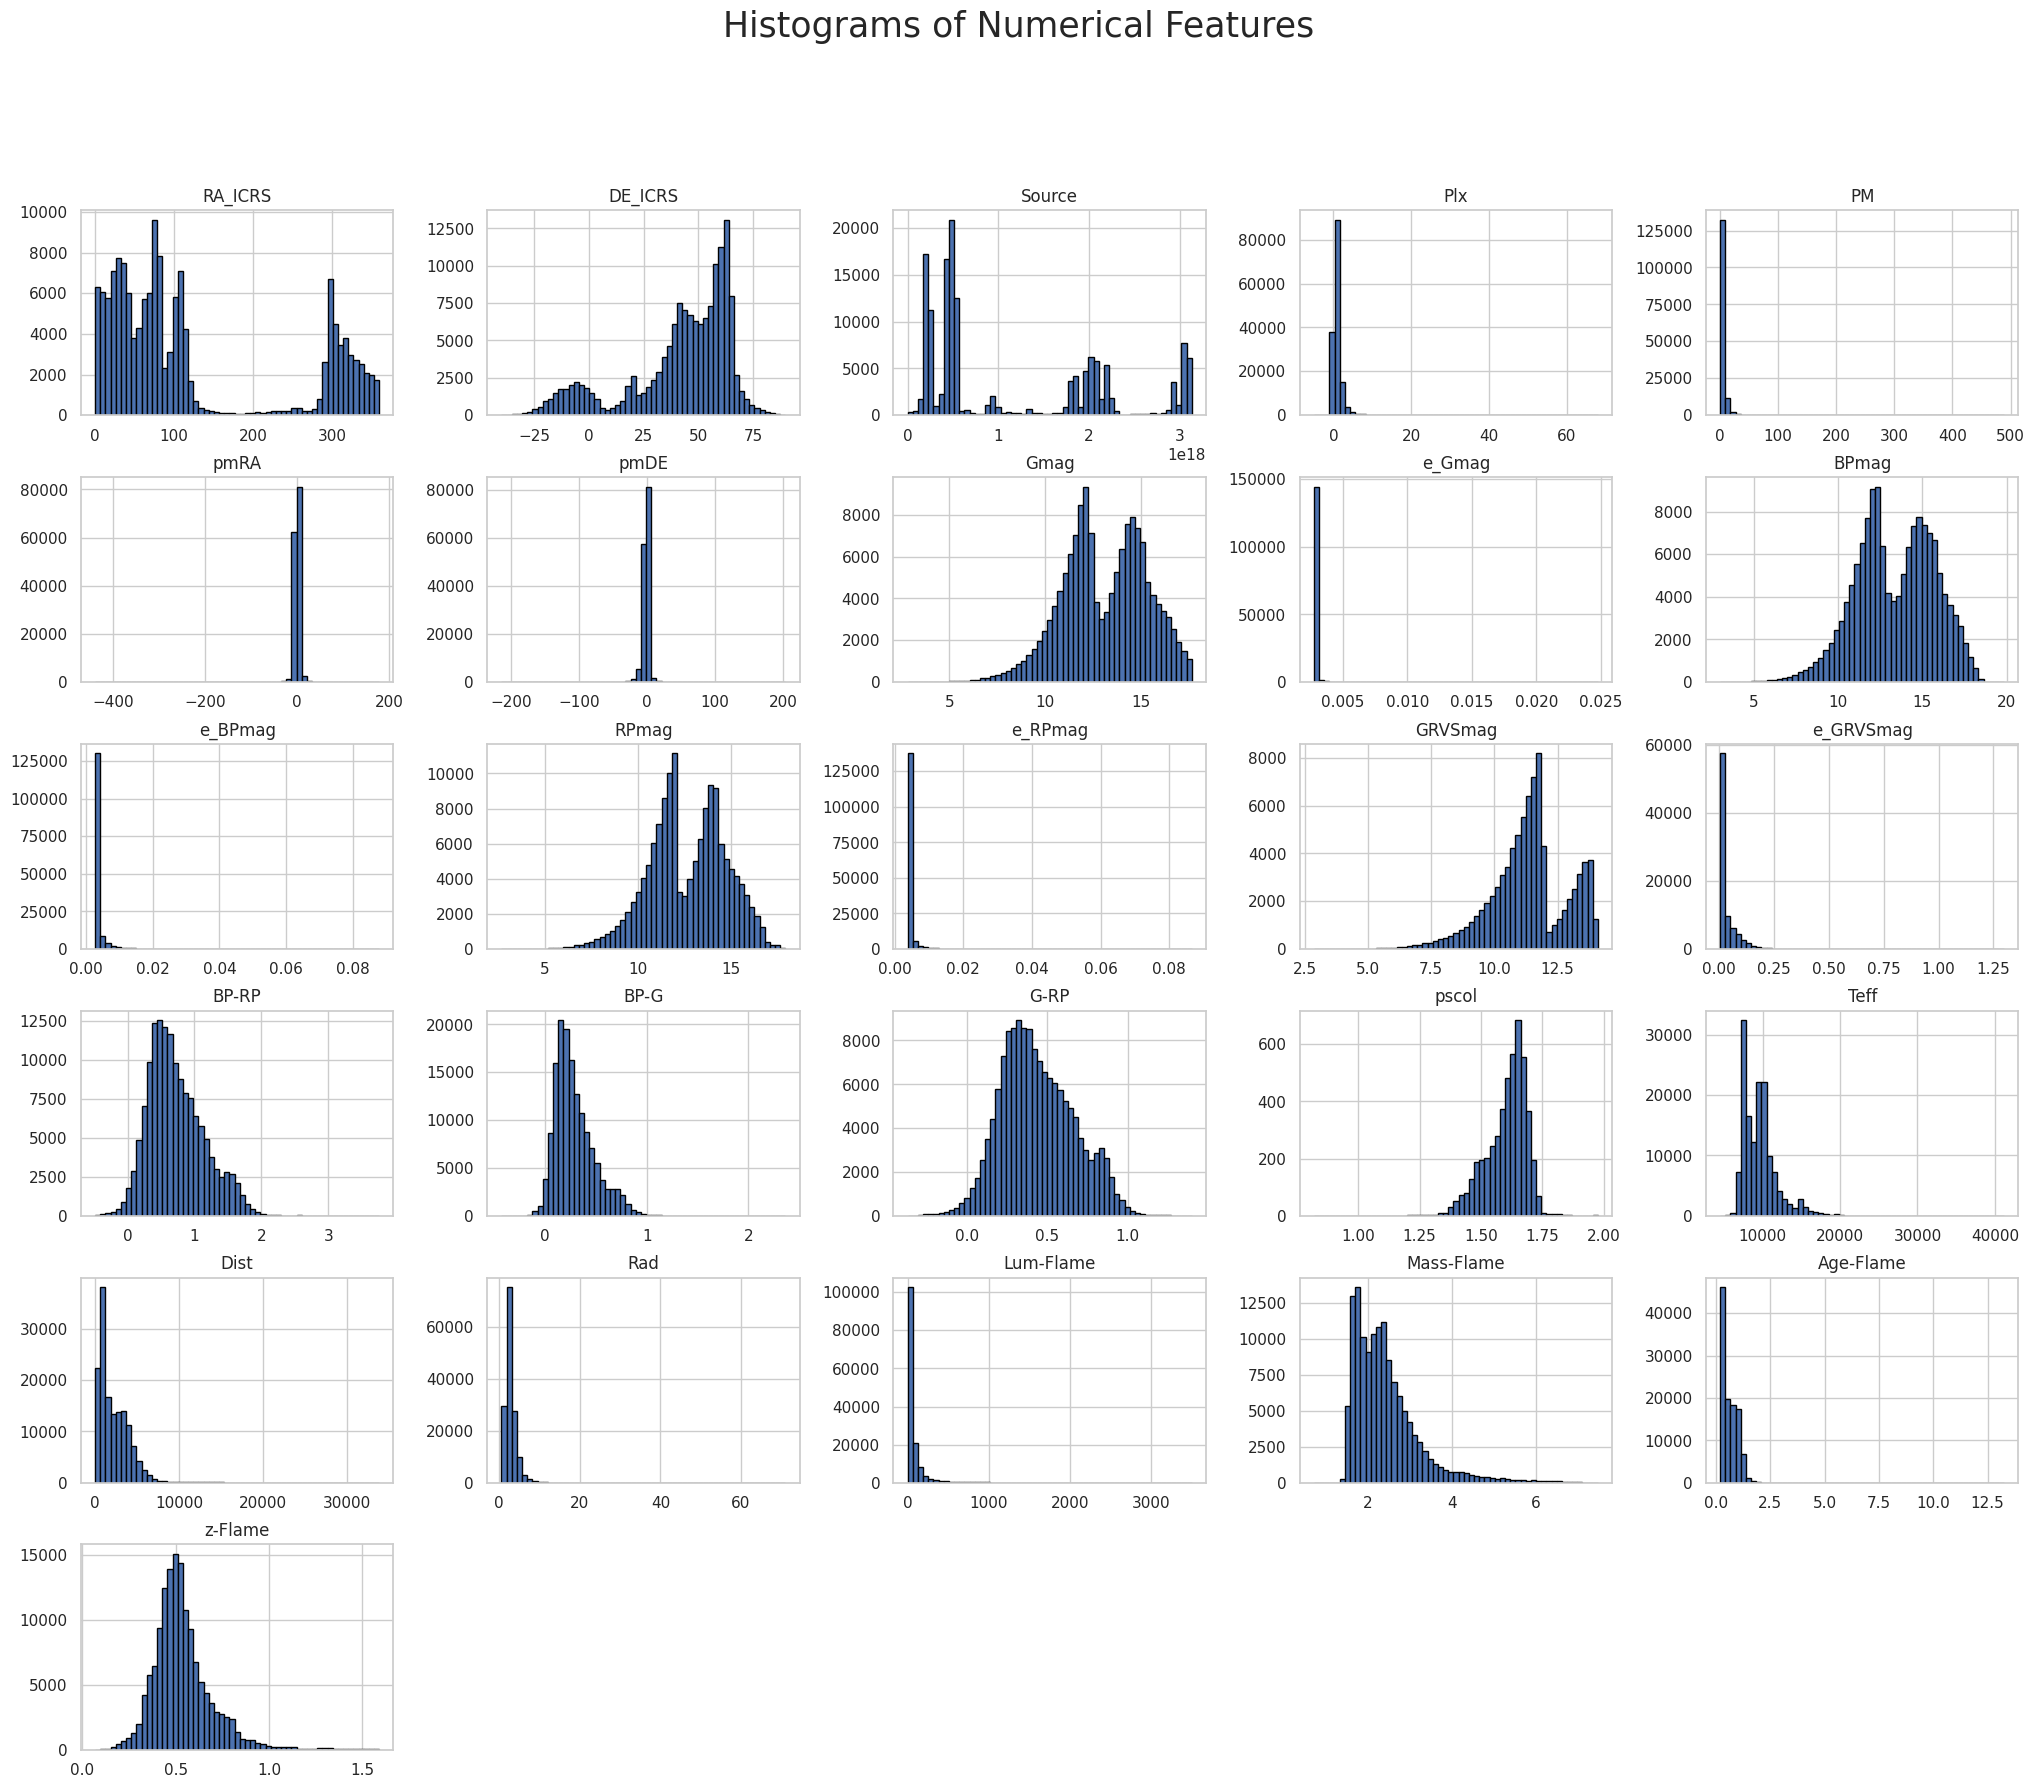

In [80]:
# Visualize the distribution of numerical features
numerical_features = selected_columns
train_df[numerical_features].hist(figsize=(25, 20), bins=55, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', size=25)
plt.show()

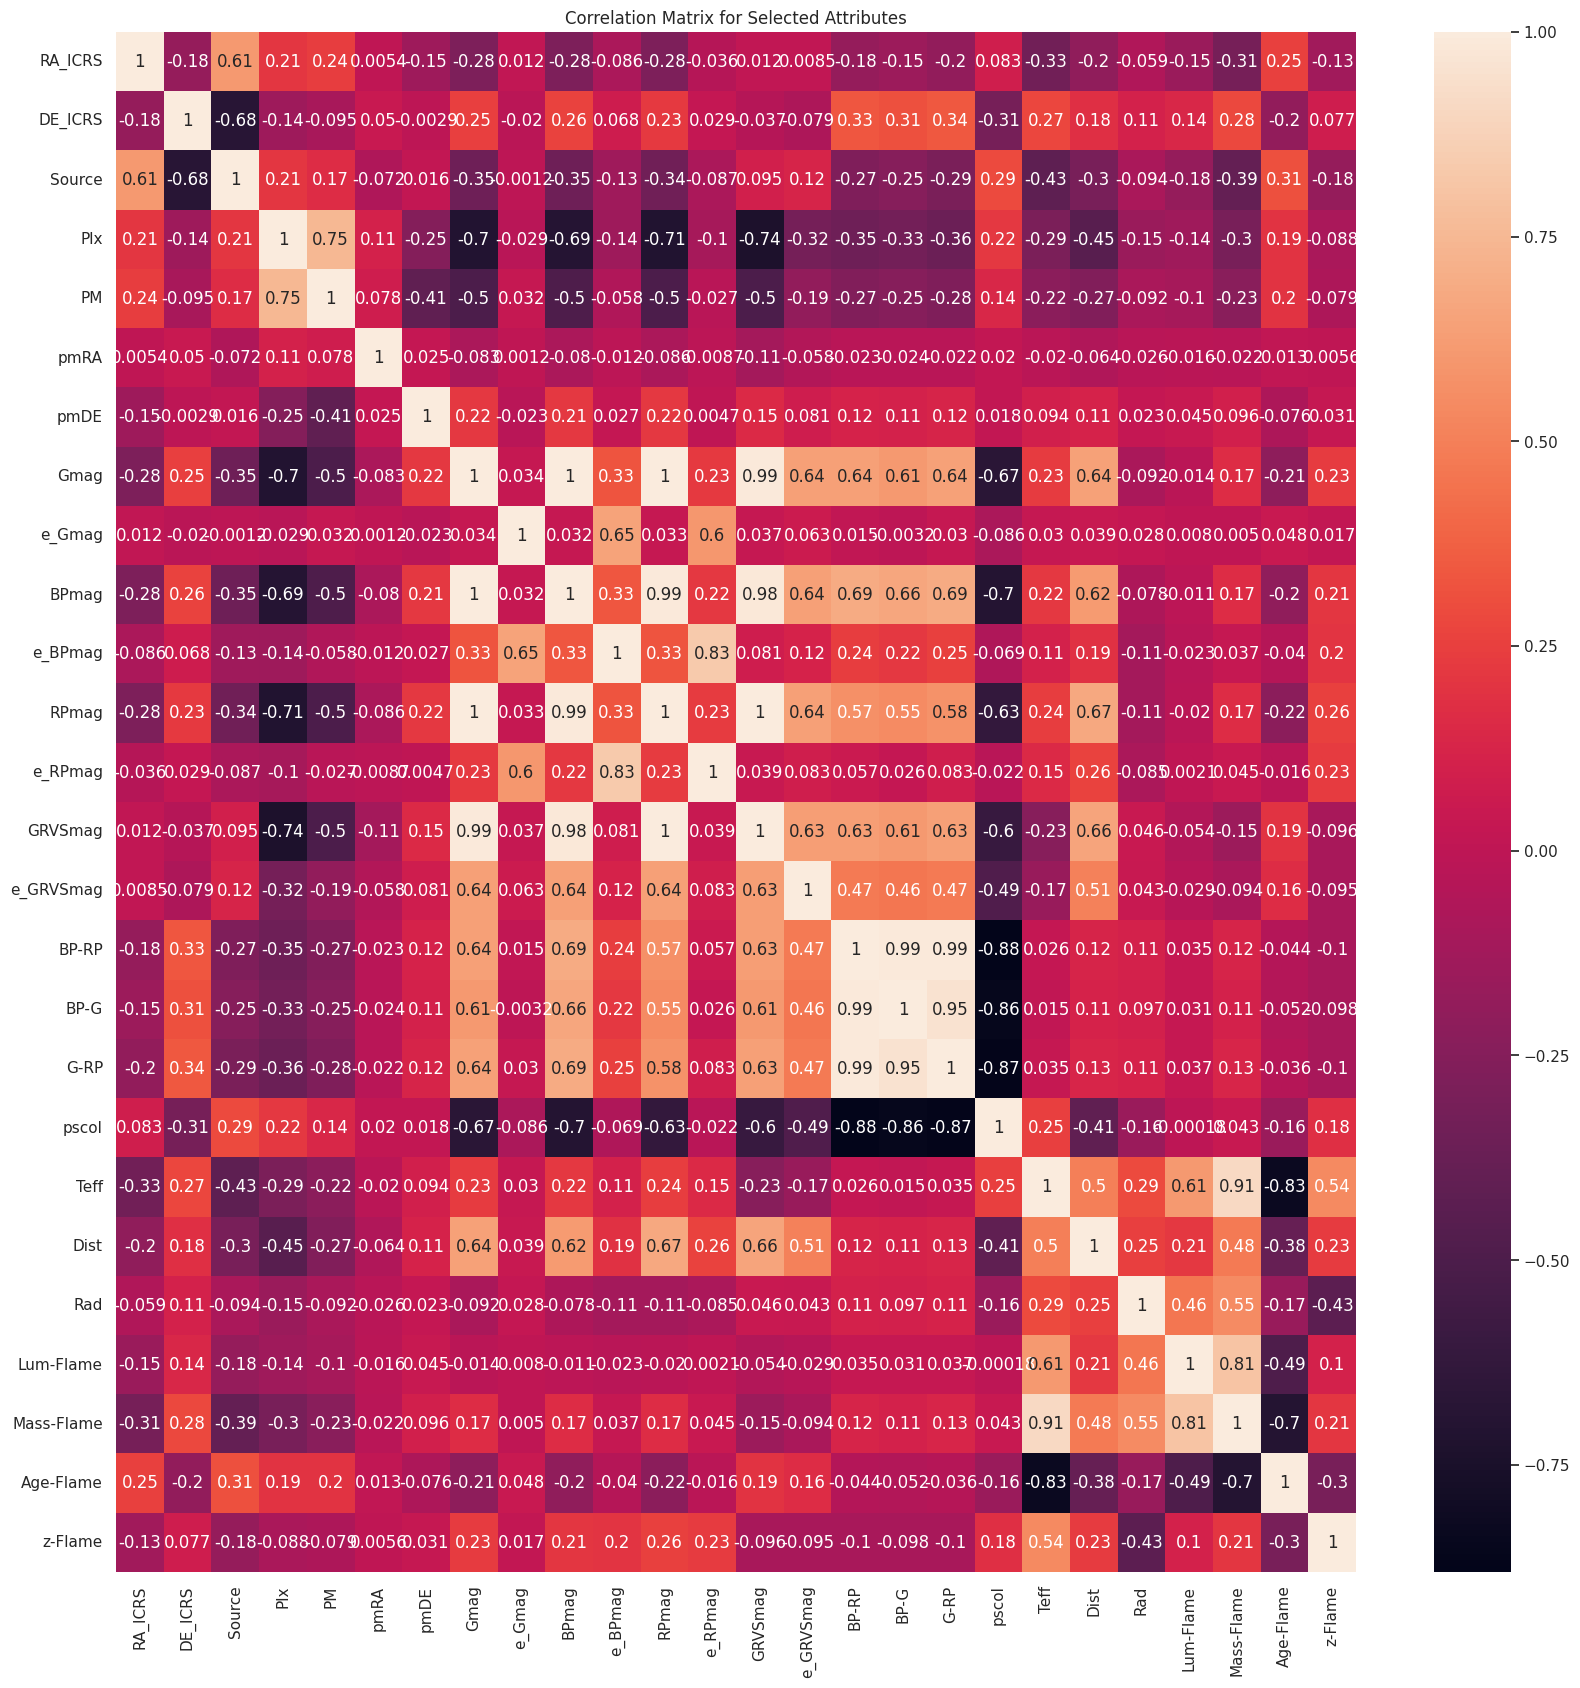

In [81]:
# Correlation matrix
plt.figure(figsize=(20, 20))
ax = sns.heatmap(train_df[selected_columns].corr(), annot=True)
plt.title('Correlation Matrix for Selected Attributes')
plt.show()

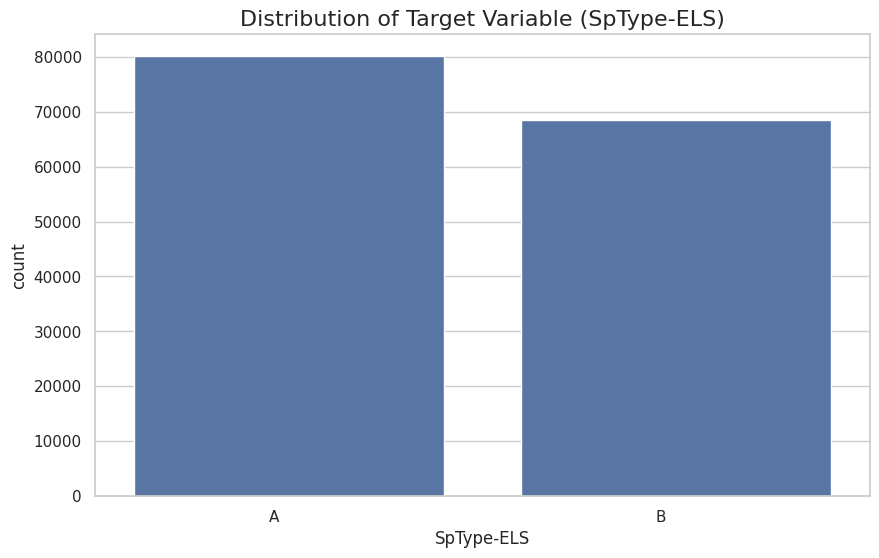

In [82]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='SpType-ELS', data=train_df)
plt.title('Distribution of Target Variable (SpType-ELS)', size=16)
plt.show()

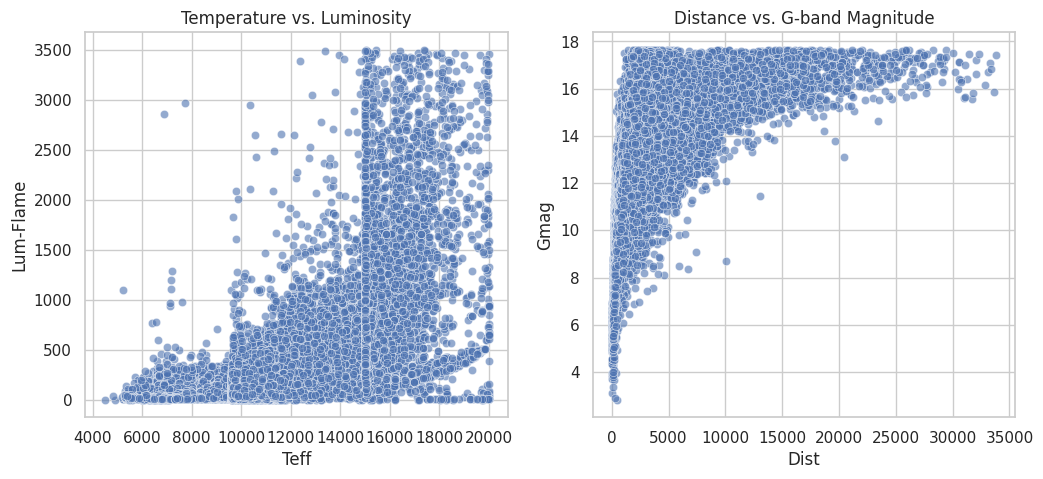

In [83]:
# Scatter Plots

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Teff', y='Lum-Flame', data=train_df, alpha=0.6)
plt.title('Temperature vs. Luminosity')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Dist', y='Gmag', data=train_df, alpha=0.6)
plt.title('Distance vs. G-band Magnitude')
plt.show()

In [84]:
#Data pre-processing
# Define features and target
features = train_df.drop(columns=['ID', 'Unnamed: 0', 'SpType-ELS'])
target = train_df['SpType-ELS']

# Encode target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(features, target_encoded, test_size=0.3, random_state=RANDOM_STATE)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)


In [85]:
# Normalization
# Correctly handling NaN values for normalization by replacing them with a placeholder
age_flame_temp = train_df['Age-Flame'].fillna(-1)

# Re-initializing scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Min-Max Normalization with placeholder for NaN values
train_df['Age-Flame_MinMax'] = min_max_scaler.fit_transform(age_flame_temp.values.reshape(-1, 1))

# Z-Score Normalization with placeholder for NaN values
train_df['Age-Flame_ZScore'] = standard_scaler.fit_transform(age_flame_temp.values.reshape(-1, 1))

# Replacing the placeholder values back to NaN in the normalized columns
train_df['Age-Flame_MinMax'] = train_df['Age-Flame_MinMax'].replace(min_max_scaler.transform([[-1]])[0][0], np.nan)
train_df['Age-Flame_ZScore'] = train_df['Age-Flame_ZScore'].replace(standard_scaler.transform([[-1]])[0][0], np.nan)

# Display the first few rows to verify the normalization
train_df[['Age-Flame', 'Age-Flame_MinMax', 'Age-Flame_ZScore']].head()


,Age-Flame,Age-Flame_MinMax,Age-Flame_ZScore
0,0.336,0.093669,0.161771
1,1.033,0.142537,1.063996
2,1.124,0.148917,1.181790
3,0.320,0.092547,0.141060
4,1.288,0.160415,1.394078


In [86]:
# Discretizing the 'Mass-Flame' attribute into categories
bins = [0, 2, 4, 8]
labels = ['Small', 'Medium', 'Large']
train_df['Mass-Flame_Cat'] = pd.cut(train_df['Mass-Flame'], bins=bins, labels=labels, right=False)

# Frequency of each category
mass_flame_category_freq = train_df['Mass-Flame_Cat'].value_counts()

mass_flame_category_freq

Mass-Flame_Cat
Medium    82841
Small     45868
Large      7278
Name: count, dtype: int64

In [95]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'SVM': SVC(random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE)
}

# Train and evaluate each classifier
results = {}
roc_data = {}
confusion_matrices = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_val_pred = clf.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred, labels=np.unique(y_val_pred), target_names=label_encoder.classes_[np.unique(y_val_pred)])
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }
    # Calculate ROC curve and AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_val_scaled)
        y_score = y_score[:, 1]
    else:
        y_score = clf.decision_function(X_val_scaled)
        y_score = y_score if y_score.ndim == 1 else y_score[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }
    # Calculate confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    confusion_matrices[name] = cm


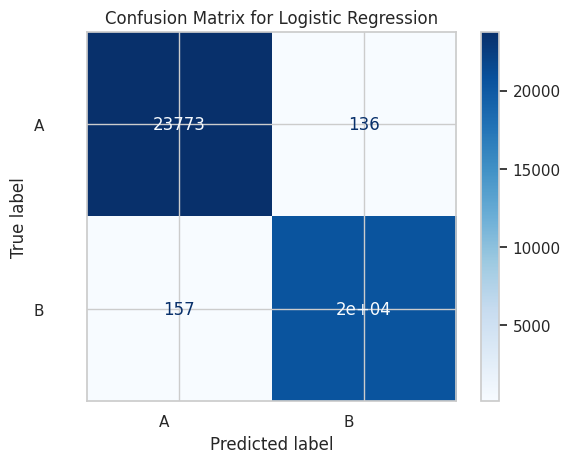

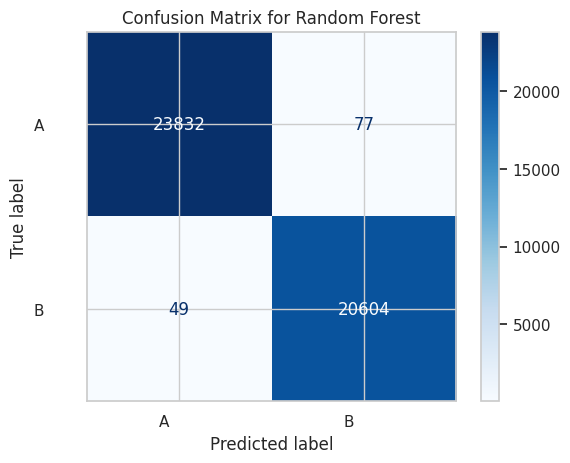

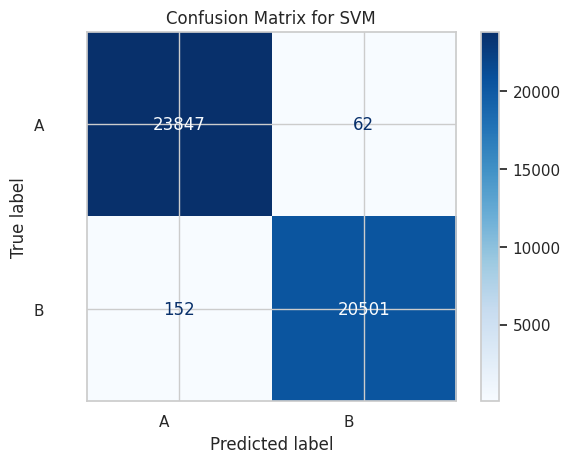

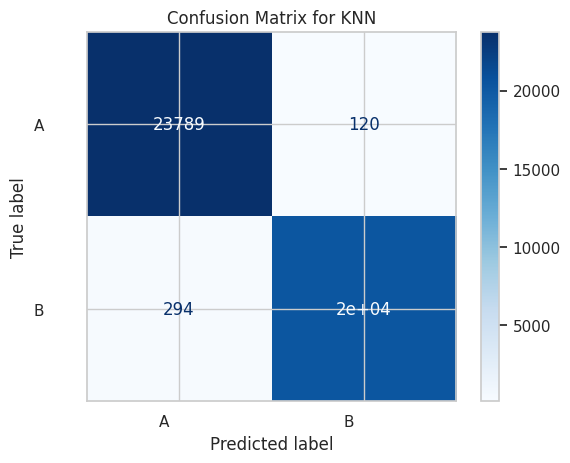

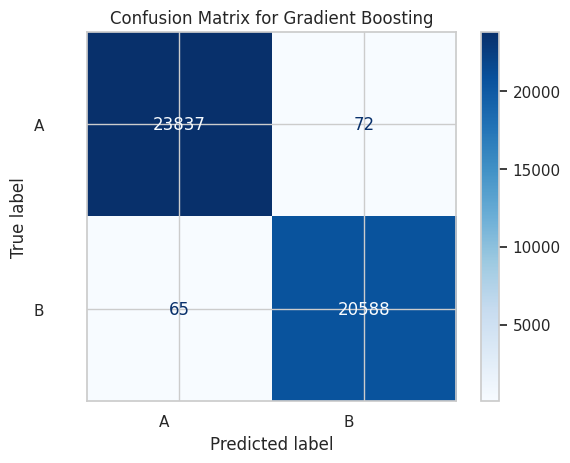

In [96]:
# Plot confusion matrices
for name, cm in confusion_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

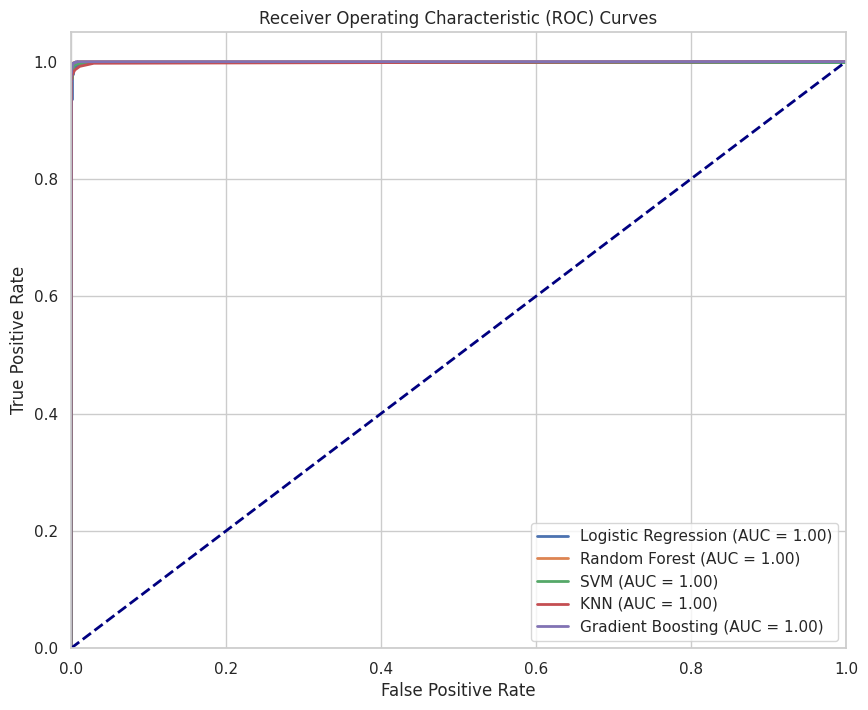

Logistic Regression:
Accuracy: 0.9934248911628742
Report:
              precision    recall  f1-score   support

     A             0.99      0.99      0.99     23909
     B             0.99      0.99      0.99     20653

    accuracy                           0.99     44562
   macro avg       0.99      0.99      0.99     44562
weighted avg       0.99      0.99      0.99     44562


Random Forest:
Accuracy: 0.9971724787935909
Report:
              precision    recall  f1-score   support

     A             1.00      1.00      1.00     23909
     B             1.00      1.00      1.00     20653

    accuracy                           1.00     44562
   macro avg       1.00      1.00      1.00     44562
weighted avg       1.00      1.00      1.00     44562


SVM:
Accuracy: 0.9951977020780037
Report:
              precision    recall  f1-score   support

     A             0.99      1.00      1.00     23909
     B             1.00      0.99      0.99     20653

    accuracy                

In [88]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Display results
for name, result in results.items():
    print(f"{name}:\nAccuracy: {result['accuracy']}\nReport:\n{result['classification_report']}\n")


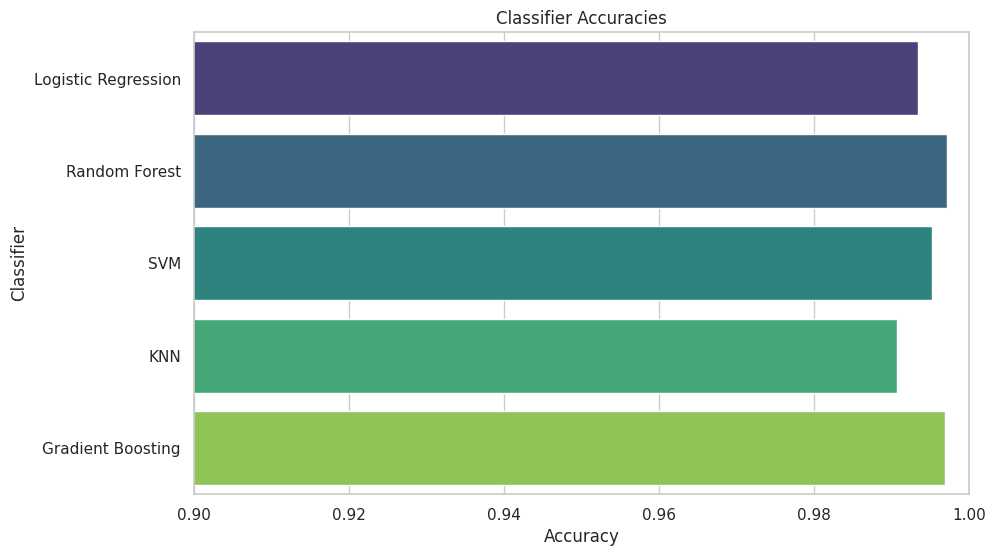

,Classifier,Accuracy
0,Logistic Regression,0.993425
1,Random Forest,0.997172
2,SVM,0.995198
3,KNN,0.990710
4,Gradient Boosting,0.996926


In [89]:
# Visualization of classifier results
results_df = pd.DataFrame({
    'Classifier': [name for name in results.keys()],
    'Accuracy': [result['accuracy'] for result in results.values()]
})

# Bar plot of classifier accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', hue="Classifier", data=results_df, palette='viridis')
plt.title('Classifier Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0.9, 1.0)  # Assuming high accuracy based on previous context
plt.show()

# Display the dataframe with classifier results
display(results_df)

In [90]:
# Select the best classifier based on accuracy
best_classifier_name = max(results, key=lambda x: results[x]['accuracy'])
best_classifier = classifiers[best_classifier_name]

# Train the best classifier on the full training data
best_classifier.fit(X_train_scaled, y_train)

# Preprocess the unknown dataset
unknown_features = unknown_df.drop(columns=['ID', 'Unnamed: 0'])
unknown_features_imputed = imputer.transform(unknown_features)
unknown_features_scaled = scaler.transform(unknown_features_imputed)

# Predict the SpType-ELS for the unknown dataset
unknown_predictions = best_classifier.predict(unknown_features_scaled)

# Decode the predictions back to original labels
unknown_predictions_labels = label_encoder.inverse_transform(unknown_predictions)

# Prepare the submission dataframe
submission_df = unknown_df[['ID']].copy()
submission_df['SpType-ELS'] = unknown_predictions_labels

# Save the submission file
submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

# Display the submission dataframe
display(submission_df.head())

,ID,SpType-ELS
0,119089,B
1,24912,A
2,6264,A
3,81903,A
4,110917,B
